## Notebook per importare valori loss durante il training da training.dat

In [1]:
from db_utils import *
desc = load_model('models/classificatore_50_52_54_56_58_60.h5')

/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/usr/local/tensorflow/1.14-0/lib/python3.6/site-packages/tensorf

In [20]:
rv = [54.]
db, _ = load_data(rv)

In [36]:
gen = np.load('../lorenz_wgangp_new/runs/3/gen_trajs.npy')

In [37]:
pred = desc.predict(gen)

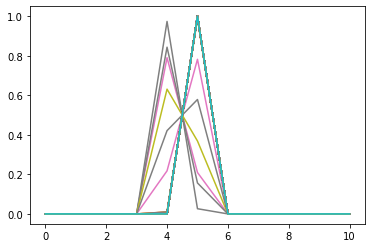

In [38]:
for preds in pred[:100]: plt.plot(preds)
plt.show()

In [24]:
# calculate the inception score for p(y|x)
def calculate_inception_score(p_yx, eps=1E-16):
    # calculate p(y)
    p_y = np.expand_dims(p_yx.mean(axis=0), 0)
    # kl divergence for each image
    kl_d = p_yx * (np.log(p_yx + eps) - np.log(p_y + eps))
    # sum over classes
    sum_kl_d = kl_d.sum(axis=1)
    # average over images
    avg_kl_d = np.mean(sum_kl_d)
    # undo the logs
    is_score = np.exp(avg_kl_d)
    return is_score
 
# conditional probabilities for high quality images
p_yx = np.asarray([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0,0.0], [0.0, 0.0, 1.0,0.0],[0.0, 0.0, 0.0, 1.0]])
score = calculate_inception_score(pred)
print(score)

4.1130223


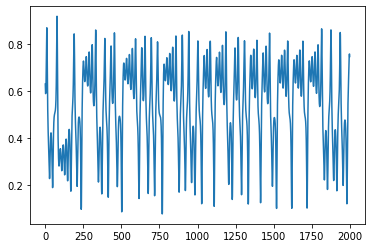

In [16]:
plt.plot(db[356])